## EDA Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sabrinasayed/Documents/Flatiron/Phase 1/Phase 1 Project/Phase-1-Project/Clean Data Only/Clean_Aviation_Data_Final.csv', index_col= 'Event Date')

In [3]:
df.columns

Index(['Unnamed: 0', 'Investigation Type', 'Location', 'Country',
       'Airport Name', 'Injury Severity', 'Aircraft Damage', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase Of Flight', 'Total Passengers', 'Make-Model'],
      dtype='object')

In [4]:
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1427 entries, 1982-01-03 to 2022-12-01
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation Type      1427 non-null   object 
 1   Location                1427 non-null   object 
 2   Country                 1427 non-null   object 
 3   Airport Name            1427 non-null   object 
 4   Injury Severity         1427 non-null   object 
 5   Aircraft Damage         1427 non-null   object 
 6   Make                    1427 non-null   object 
 7   Model                   1427 non-null   object 
 8   Amateur Built           1427 non-null   object 
 9   Number Of Engines       1427 non-null   float64
 10  Engine Type             1427 non-null   object 
 11  Purpose Of Flight       1427 non-null   object 
 12  Total Fatal Injuries    1427 non-null   float64
 13  Total Serious Injuries  1427 non-null   float64
 14  Total Minor Injuries    1427 n

In [6]:
df = df.reset_index()

## Understanding the Dataset

In [7]:
#Let's create new columns showing the rate of fatalities, serious injuries, minor injuries, and no injuries. 
## This ratio will show us what fraction of the cabin has been uninjured, injured, or killed.
df['Fatal Injury Ratio'] = (df['Total Fatal Injuries']) / (df['Total Passengers'])
df['Serious Injury Ratio'] = (df['Total Serious Injuries']) / (df['Total Passengers'])
df['Minor Injury Ratio'] = (df['Total Minor Injuries']) / (df['Total Passengers'])
df['Uninjured Ratio'] = (df['Total Uninjured']) / (df['Total Passengers'])

There's a clear dimorphism of the Fatal Injury Ratio that clusters at 0 and at 1.

Text(0.5, 1.0, 'Fatal Injury Ratio By Make')

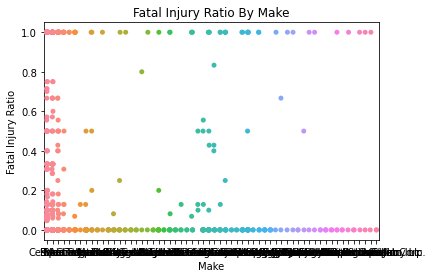

In [8]:
fig, ax = plt.subplots()

sns.stripplot(x='Make', y='Fatal Injury Ratio', data= df, ax=ax)

ax.set_title('Fatal Injury Ratio By Make')

The number of engines does not seem to effect the fatality ratio the way we thought it might. There's more makes with lower fatalities with only 1 engine. 

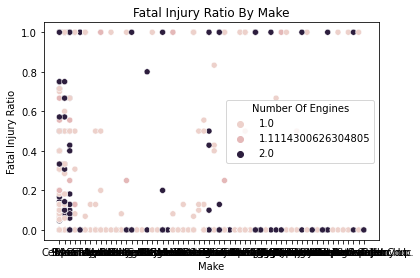

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Number Of Engines', data= df, ax=ax)
ax.set_title('Fatal Injury Ratio By Make')
plt.savefig('fatal_injury_by_engine.png')

There seems to be some correlation between the weather condition when it is VMC and lower fatality ratios.

## Filtering Down Manufacturers

In [10]:
#Let's just plot the top ten most common makes so we can see the data better and get rid of the manufacturers with less than 10 values
top_ten_makes = ['Cessna', 'Piper', 'Beech', 'Grumman', 'Mooney', 'Cirrus Design Corp', 'Raytheon Aircraft Company', 'Air Tractor', 'Dehavilland', 'Cirrus']
top_ten_df = df[df['Make'].isin(top_ten_makes)]
top_ten_df = top_ten_df.sort_values('Make')
top_ten_df

,Event Date,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,...,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model,Fatal Injury Ratio,Serious Injury Ratio,Minor Injury Ratio,Uninjured Ratio
27,1982-01-21,Accident,"DOS PALOS, CA",United States,SPAIN-AIR AIRPORT,Fatal,Substantial,Air Tractor,301,No,...,0.0,1.0,VMC,Takeoff,1.0,Air Tractor 301,0.000000,0.000000,0.000000,1.000000
1023,2013-08-09,Accident,"Dumas, AR",United States,Billy Free Memorial Airport,Fatal,Substantial,Air Tractor,AT-400,No,...,0.0,1.0,VMC,Unknown,1.0,Air Tractor AT-400,0.000000,0.000000,0.000000,1.000000
1296,2019-08-08,Accident,"Sumner, IA",United States,Unknown,Fatal,Destroyed,Air Tractor,AT502,No,...,0.0,0.0,VMC,Unknown,1.0,Air Tractor AT502,1.000000,0.000000,0.000000,0.000000
1241,2018-08-14,Accident,"Northport, WA",United States,Unknown,Fatal,Substantial,Air Tractor,AT802,No,...,1.0,0.0,Unknown,Unknown,1.0,Air Tractor AT802,0.000000,0.000000,1.000000,0.000000
1169,2016-09-01,Accident,"Sorriso, Brazil",Brazil,Santa Anastacia Airport,Fatal,Destroyed,Air Tractor,AT502,No,...,0.0,0.0,VMC,Unknown,2.0,Air Tractor AT502,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,2022-07-15,Accident,"Brunswick, GA",United States,BRUNSWICK GOLDEN ISLES,Fatal,Substantial,Raytheon Aircraft Company,400A,No,...,0.0,2.0,VMC,Unknown,2.0,Raytheon Aircraft Company 400A,0.000000,0.000000,0.000000,1.000000
643,2007-10-04,Accident,"Pagosa Springs, CO",United States,Not Applicable,Fatal,Destroyed,Raytheon Aircraft Company,C90A,No,...,1.0,2.0,IMC,Descent,7.0,Raytheon Aircraft Company C90A,0.428571,0.142857,0.142857,0.285714
1198,2017-04-15,Accident,"Richfield, UT",United States,RICHFIELD MUNI,Fatal,Substantial,Raytheon Aircraft Company,B200,No,...,0.0,1.0,VMC,Unknown,1.0,Raytheon Aircraft Company B200,0.000000,0.000000,0.000000,1.000000
1054,2014-05-13,Incident,"Sugar Land, TX",United States,Sugar Land Regional Airport,Fatal,Minor,Raytheon Aircraft Company,400A,No,...,0.0,2.0,UNK,Unknown,2.0,Raytheon Aircraft Company 400A,0.000000,0.000000,0.000000,1.000000


Narrow it down further to the manufacturers with more than 20 values each, anything less than that will be removed because anything less than 20 will be difficult to extract accurate statistical analyses from. This gives us the top 5 makes.

In [11]:
top_five_makes = ['Cessna', 'Piper', 'Beech', 'Grumman', 'Mooney']
filtered_df = top_ten_df[top_ten_df['Make'].isin(top_five_makes)]
filtered_df['Make'].value_counts()

Cessna     619
Piper      322
Beech      174
Grumman     30
Mooney      28
Name: Make, dtype: int64

In [12]:
filtered_df

,Event Date,Investigation Type,Location,Country,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,...,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Total Passengers,Make-Model,Fatal Injury Ratio,Serious Injury Ratio,Minor Injury Ratio,Uninjured Ratio
128,1982-04-07,Accident,"WINSTON-SALEM, NC",United States,SMITH REYNOLDS,Fatal,Substantial,Beech,65-A90,No,...,0.0,2.0,VMC,Landing,2.0,Beech 65-A90,0.0,0.000000,0.000000,1.0
721,2008-12-14,Accident,"Rocksprings, TX",United States,Unknown,Fatal,Substantial,Beech,C90,No,...,0.0,0.0,VMC,Unknown,1.0,Beech C90,1.0,0.000000,0.000000,0.0
1245,2018-09-03,Accident,"Burbank, CA",United States,Bob Hope,Fatal,Substantial,Beech,200,No,...,0.0,1.0,VMC,Unknown,1.0,Beech 200,0.0,0.000000,0.000000,1.0
727,2008-12-27,Accident,"Fort Myers, FL",United States,Southwest Florida Internationa,Fatal,Substantial,Beech,E18S,No,...,1.0,0.0,VMC,Unknown,1.0,Beech E18S,0.0,0.000000,1.000000,0.0
718,2008-11-23,Accident,"God's Lake Narrows, Canada",Canada,God's Lake Narrows Airport,Fatal,Destroyed,Beech,A100,No,...,0.0,0.0,VMC,Unknown,5.0,Beech A100,0.0,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2012-08-17,Accident,"Holton, KS",United States,Unknown,Fatal,Substantial,Piper,PA-24-260,No,...,2.0,0.0,VMC,Unknown,3.0,Piper PA-24-260,0.0,0.333333,0.666667,0.0
954,2012-06-13,Accident,"Ocilla, GA",United States,Unknown,Fatal,Substantial,Piper,PA-28-180,No,...,0.0,0.0,VMC,Unknown,1.0,Piper PA-28-180,0.0,1.000000,0.000000,0.0
339,1982-08-14,Accident,"KANKAKEE, IL",United States,GREATER KANKAKEE,Fatal,Substantial,Piper,PA-28-151,No,...,0.0,2.0,VMC,Landing,2.0,Piper PA-28-151,0.0,0.000000,0.000000,1.0
956,2012-06-22,Accident,"Metropolis, IL",United States,Metropolis Municipal,Fatal,Substantial,Piper,PA-46-310P,No,...,0.0,1.0,VMC,Unknown,1.0,Piper PA-46-310P,0.0,0.000000,0.000000,1.0


## Understanding the Relationships with Top 5 Manufacturers

The lowest fatal injury ratio is Grumman. We'll look into this further.

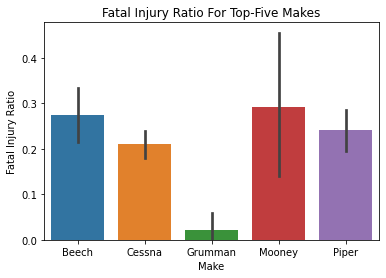

In [13]:
fig, ax = plt.subplots()
sns.barplot(x= 'Make', y='Fatal Injury Ratio', data= filtered_df, ax=ax)
ax.set_title('Fatal Injury Ratio For Top-Five Makes')
#plt.savefig('fatality_top_five.png')

There's way more aircrafts with reciprocating engines and turbo props.

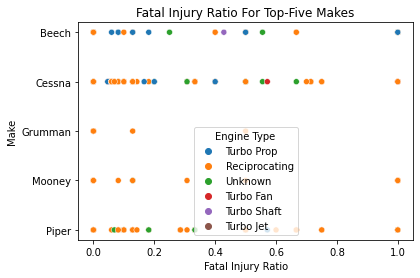

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Fatal Injury Ratio', y='Make', hue= 'Engine Type', data= filtered_df, ax=ax)
ax.set_title('Fatal Injury Ratio For Top-Five Makes')
#plt.savefig('fatality_engines_top_five.png')

In [15]:
#Get rid of the unknown weather values that are left
filtered_df = filtered_df[filtered_df['Weather Condition'] != 'UNK']
filtered_df = filtered_df[filtered_df['Weather Condition'] != 'Unknown']
filtered_df['Weather Condition'].value_counts()

VMC    917
IMC    158
Name: Weather Condition, dtype: int64

When we add weather condition to the mix it looks like Cessna performs well in both good and bad weather conditions.

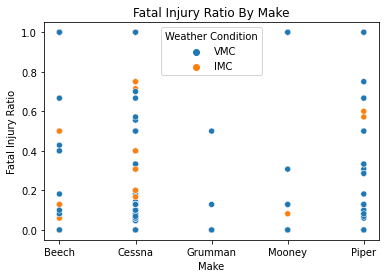

In [19]:
fig, ax = plt.subplots()
sns.scatterplot(x= 'Make', y='Fatal Injury Ratio', hue= 'Weather Condition', data= filtered_df, ax=ax)

ax.set_title('Fatal Injury Ratio By Make')

#plt.savefig('fatal_injury_weather.png')

- Highest Average Fatality Ratio is happening in Approach, Climb, Maneuvering, Cruise and Go-Around Phases.
- The lowest average fatalities are happening in the Standing, Landing, and Taxi Phases.
- IMC Weather Conditions are more often present with Higher Average Fatality Rate while VMC are present with lower average fatality rates

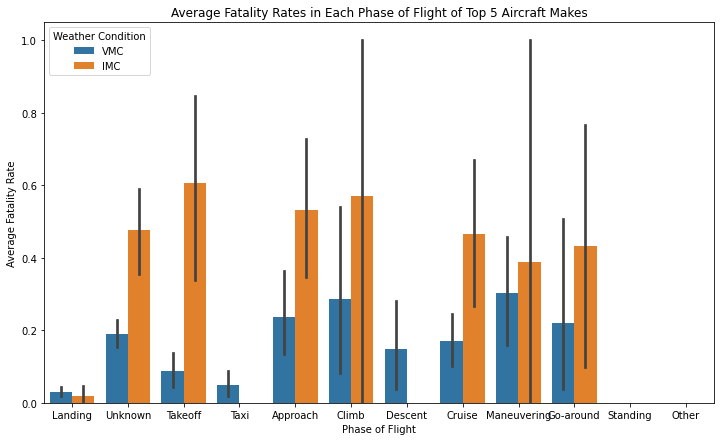

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(12,7))
sns.barplot(x='Broad Phase Of Flight', y= 'Fatal Injury Ratio', hue= 'Weather Condition', data= filtered_df)
plt.xlabel('Phase of Flight')
plt.ylabel('Average Fatality Rate')
plt.title('Average Fatality Rates in Each Phase of Flight of Top 5 Aircraft Makes')
plt.show()

#plt.savefig('avg_fatality_phase_weather.png')

## Creating the Risk Index

We are assessing safety by creating a risk index that takes in a Make & Model and will output a risk index rank (i.e. High, Medium, and Low Risk) and Risk Values, the numeric value between 0 and 1 calculated by the risk score we create in our function.

Risk Index Indicators: Average Fatality Rate, Average Fatality with Substantial Aircraft Damage, Median Uninjured Rate, and Average Minor Injury Rate

In [21]:
# Take the groupby mean of uninjured rates for each make-model; 
filtered_df[['Uninjured Ratio', 'Make-Model']].groupby('Make-Model').mean()

,Uninjured Ratio
Make-Model,
Beech 1900,0.500000
Beech 200,0.637363
Beech 35,1.000000
Beech 36,0.750000
Beech 400,0.666667
...,...
Piper PA31-350,1.000000
Piper PA31T,0.000000
Piper PA32R,0.500000


### Build a risk index dataframe

In [22]:
#Let's use this column to start our risk_index_df which will consist of all the risk indicators
risk_index_df = filtered_df[['Uninjured Ratio', 'Make-Model']].groupby('Make-Model').mean()
risk_index_df.rename(columns={"Uninjured Ratio": "Average Uninjured Rate"}, inplace=True)
risk_index_df

second = filtered_df[['Fatal Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
risk_index_df['Average Fatality Rate'] = second['Fatal Injury Ratio']

# Calculate the average fatality rate when there is Substantial damage to the aircraft
substantial_damage_df = filtered_df[filtered_df['Aircraft Damage'] == 'Substantial']
substantial_damage_df
third = substantial_damage_df[['Fatal Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()

# Add this column to the risk index df
risk_index_df['Average Fatality Rate w/ Substantial Damage'] = third

# Calculate the average minor injury rate 
fourth = filtered_df[['Minor Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
fourth

risk_index_df['Average Minor Injury Rate'] = fourth
risk_index_df

fifth = filtered_df[['Serious Injury Ratio', 'Make-Model']].groupby('Make-Model').mean()
fifth

risk_index_df['Average Serious Injury Rate'] = fifth

In [23]:
#Checking for the missing values and imputing them with the mean them
risk_index_df['Average Fatality Rate w/ Substantial Damage'].isna().value_counts()

print(risk_index_df['Average Fatality Rate w/ Substantial Damage'].mean())

risk_index_df['Average Fatality Rate w/ Substantial Damage']= risk_index_df['Average Fatality Rate w/ Substantial Damage'].fillna(risk_index_df['Average Fatality Rate w/ Substantial Damage'].mean())
risk_index_df['Average Fatality Rate w/ Substantial Damage'].isna().value_counts()

0.07093000750357291


False    238
Name: Average Fatality Rate w/ Substantial Damage, dtype: int64

Our risk index dataframe is built. We will be using this dataframe to input values into our risk index function which will assess the risk level as High, Medium, or Low, based on the given conditions.

In [24]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate
Make-Model,,,,,
Beech 1900,0.500000,0.500000,0.000000,0.000000,0.000000
Beech 200,0.637363,0.302198,0.053571,0.049451,0.010989
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000
Beech 36,0.750000,0.000000,0.000000,0.000000,0.250000
Beech 400,0.666667,0.000000,0.000000,0.000000,0.333333
...,...,...,...,...,...
Piper PA31-350,1.000000,0.000000,0.070930,0.000000,0.000000
Piper PA31T,0.000000,1.000000,0.070930,0.000000,0.000000
Piper PA32R,0.500000,0.250000,0.000000,0.000000,0.250000


### Build the Risk Index

In [25]:
## Use the average of the ratios to set our conditions for risk
print(filtered_df['Uninjured Ratio'].mean())
print(filtered_df['Serious Injury Ratio'].mean())
print(filtered_df['Minor Injury Ratio'].mean())
print(filtered_df['Fatal Injury Ratio'].mean())
print(substantial_damage_df['Fatal Injury Ratio'].mean())

0.5941919686716328
0.10234870118732338
0.10682344519052284
0.19663588495052095
0.0830502764855524


In [26]:
#Normalizing the risk data frame: (x-x.min)/(x.max-x.min)

risk_index_df['Average Uninjured Rate'] = (risk_index_df['Average Uninjured Rate'] - risk_index_df['Average Uninjured Rate'].min()) / (risk_index_df['Average Uninjured Rate'].max() - risk_index_df['Average Uninjured Rate'].min())
risk_index_df['Average Fatality Rate w/ Substantial Damage'] = (risk_index_df['Average Fatality Rate w/ Substantial Damage'] - risk_index_df['Average Fatality Rate w/ Substantial Damage'].min()) / (risk_index_df['Average Fatality Rate w/ Substantial Damage'].max() - risk_index_df['Average Fatality Rate w/ Substantial Damage'].min())
risk_index_df['Average Fatality Rate'] = (risk_index_df['Average Fatality Rate'] - risk_index_df['Average Fatality Rate'].min()) / (risk_index_df['Average Fatality Rate'].max() - risk_index_df['Average Fatality Rate'].min())
risk_index_df['Average Minor Injury Rate'] = (risk_index_df['Average Minor Injury Rate'] - risk_index_df['Average Minor Injury Rate'].min()) / (risk_index_df['Average Minor Injury Rate'].max() - risk_index_df['Average Minor Injury Rate'].min())
risk_index_df['Average Serious Injury Rate'] = (risk_index_df['Average Serious Injury Rate'] - risk_index_df['Average Serious Injury Rate'].min()) / (risk_index_df['Average Serious Injury Rate'].max() - risk_index_df['Average Serious Injury Rate'].min())


In [ ]:
risk_index_df.describe()

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.594615,0.183655,0.106395,0.166340,0.110836
std,0.293789,0.219902,0.186832,0.241276,0.175800
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.447218,0.000000,0.000000,0.000000,0.000000
50%,0.598961,0.097779,0.000000,0.051230,0.047157
75%,0.810282,0.333333,0.106395,0.244091,0.145177
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Create the function

In [27]:
#Have the function take in a make_model in string form and the dataframe
##### 
#####
def risk_index(make_model, risk_index_df):
    # Find the row corresponding to the given Make-Model
    row = risk_index_df.loc[make_model]
   
    if row.empty:
        return "Make-Model not found"

    avg_fatality_rate = row['Average Fatality Rate']
    avg_serious_injury_rate = row['Average Serious Injury Rate']
    avg_fatality_substantial_damage = row['Average Fatality Rate w/ Substantial Damage']
    avg_uninjured_rate = row['Average Uninjured Rate']
    avg_minor_injury = row['Average Minor Injury Rate']
    
    count = 0
    # Apply the risk conditions
    if avg_fatality_rate > .20:
        count += 1
    if avg_serious_injury_rate > .10:
        count += 1
    if avg_fatality_substantial_damage > .08:
        count += 1
    if avg_uninjured_rate < .6:
        count += 1
    if avg_minor_injury < .13:
        count += 1

    # Determine risk level based on count
    if count >= 4:
        return "High Risk"
    elif count == 3:
        return "Medium Risk"
    else:
        return "Low Risk"


In [28]:
risk_index('Beech 200', risk_index_df)

'Medium Risk'

## Apply the risk function across the dataframe

In [89]:
## Create the Risk Index column
risk_index_df['Risk Index'] = risk_index_df.apply(lambda row: risk_index(row.name, risk_index_df), axis=1)

An initial look at our risk index shows that something in the data may have skewed the results to be low risk. Let's look into the data a bit more and see what might be causing this. We may need to normalize or standardize the data and possibly give the conditions different weights.

In [30]:
risk_index_df['Risk Index'].value_counts()

Low Risk       143
Medium Risk     55
High Risk       40
Name: Risk Index, dtype: int64

There are a lot of 0 values for the average fatality rate. Maybe we can give this indicator less weight, or figure out how to standardize the data better when building the risk index function


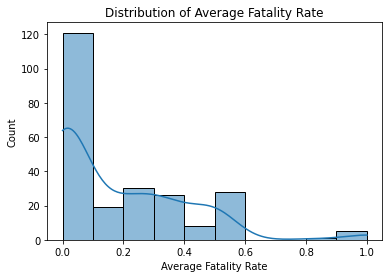

In [31]:
sns.histplot(risk_index_df['Average Fatality Rate'], bins=10, kde=True)
plt.title('Distribution of Average Fatality Rate')
plt.show()

Most of the values fall around 50% uninjured, we might be able to give this more weight since it is a more normal and more stable distribution

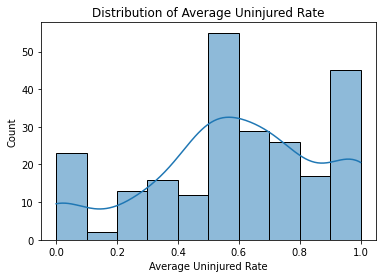

In [32]:
sns.histplot(risk_index_df['Average Uninjured Rate'], bins=10, kde=True)
plt.title('Distribution of Average Uninjured Rate')
plt.show()

Again the distribution is skewed to have a low avg fatality rate w substantial damage, we may need to give this less weight in our risk index

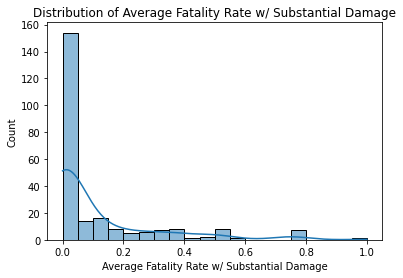

In [33]:
sns.histplot(risk_index_df['Average Fatality Rate w/ Substantial Damage'], bins=20, kde=True)
plt.title('Distribution of Average Fatality Rate w/ Substantial Damage')
plt.show()

We may be able to give this more weight in the index, since there is less data showing high rates of minor injuries


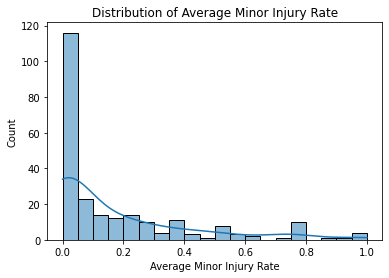

In [34]:
sns.histplot(risk_index_df['Average Minor Injury Rate'], bins=20, kde=True)
plt.title('Distribution of Average Minor Injury Rate')
plt.show()

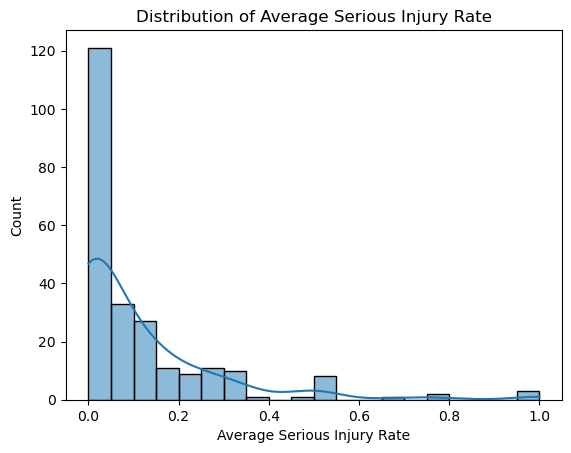

In [ ]:
sns.histplot(risk_index_df['Average Serious Injury Rate'], bins=20, kde=True)
plt.title('Distribution of Average Serious Injury Rate')
plt.show()

### Re-write the risk_index function with a weighted scoring system:

""""
This function will take in a make-model in string form, and a dataframe, and output a risk index. The risk index
will be in tuple form as Rank,Value. The values will be binned into ranks called High, Medium, and Low Risk. 
The values are calculated first by identifying the averages of each indicators to use as the threshold 
to build the conditions of risk in the function. The function also assigns each indicator condition 
a corresponding weight that takes into account whether the variable has a skewed distribution or not. Skewed
distributions will be given less weight to create a more stabilized function.
""""


In [88]:
def risk_index(make_model, risk_index_df):

    row = risk_index_df.loc[make_model]
   
    if row.empty:
        return "Make-Model not found"

    avg_fatality_rate = row['Average Fatality Rate']
    avg_serious_injury_rate = row['Average Serious Injury Rate']
    avg_fatality_substantial_damage = row['Average Fatality Rate w/ Substantial Damage']
    avg_uninjured_rate = row['Average Uninjured Rate']
    avg_minor_injury = row['Average Minor Injury Rate']

    weights = {
        'fatality_rate': .10,
        'serious_injury_rate': .10,
        'minor_injury_rate': .35,
        'substantial_damage_rate': .10,
        'uninjured_rate': .35
}

    score = (
        weights['fatality_rate'] * (avg_fatality_rate > 0.20) +
        weights['serious_injury_rate'] * (avg_serious_injury_rate > 0.10) +
        weights['substantial_damage_rate'] * (avg_fatality_substantial_damage > 0.08) +
        weights['uninjured_rate'] * (avg_uninjured_rate < 0.60) + 
        weights['minor_injury_rate'] * (avg_minor_injury < 0.13)

    )
    
    if score > .7:

        return f"High Risk, {score}"
    elif score > .4:
        
        return f"Medium Risk, {score}"
    else:
  
        return f"Low Risk, {score}"


In [37]:
#Run the index column through the updated function
risk_index_df['Risk Index'] = risk_index_df.apply(lambda row: risk_index(row.name, risk_index_df), axis=1)

In [38]:
#Create new columns to separate the risk rank and value
risk_index_df[["Risk Rank", "Risk Value"]] = risk_index_df["Risk Index"].str.split(",", expand=True)

There a little less Low Risk values here than before. The original function gave us 97 Low Risk, 60 Medium, and 33 High Risk. It seems like our updated function has an effect but it isn't a drastic change, feels just a little more stabilized.


In [39]:
risk_index_df['Risk Rank'].value_counts()

Medium Risk    94
Low Risk       91
High Risk      53
Name: Risk Rank, dtype: int64

In [40]:
# Turn the Risk Value column from objects into floats
risk_index_df['Risk Value'] = risk_index_df['Risk Value'].astype(float)
risk_index_df['Risk Value']

Make-Model
Beech 1900          0.80
Beech 200           0.55
Beech 35            0.35
Beech 36            0.45
Beech 400           0.45
                    ... 
Piper PA31-350      0.45
Piper PA31T         0.90
Piper PA32R         0.90
Piper PA46          0.35
Piper PA46-500TP    0.90
Name: Risk Value, Length: 238, dtype: float64

In [41]:
risk_index_df

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
Make-Model,,,,,,,,
Beech 1900,0.500000,0.500000,0.000000,0.000000,0.000000,"High Risk, 0.7999999999999999",High Risk,0.80
Beech 200,0.637363,0.302198,0.080357,0.074176,0.010989,"Medium Risk, 0.55",Medium Risk,0.55
Beech 35,1.000000,0.000000,0.000000,0.000000,0.000000,"Low Risk, 0.35",Low Risk,0.35
Beech 36,0.750000,0.000000,0.000000,0.000000,0.250000,"Medium Risk, 0.44999999999999996",Medium Risk,0.45
Beech 400,0.666667,0.000000,0.000000,0.000000,0.333333,"Medium Risk, 0.44999999999999996",Medium Risk,0.45
...,...,...,...,...,...,...,...,...
Piper PA31-350,1.000000,0.000000,0.106395,0.000000,0.000000,"Medium Risk, 0.44999999999999996",Medium Risk,0.45
Piper PA31T,0.000000,1.000000,0.106395,0.000000,0.000000,"High Risk, 0.9",High Risk,0.90
Piper PA32R,0.500000,0.250000,0.000000,0.000000,0.250000,"High Risk, 0.9",High Risk,0.90


In [42]:
risk_index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Beech 1900 to Piper PA46-500TP
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Average Uninjured Rate                       238 non-null    float64
 1   Average Fatality Rate                        238 non-null    float64
 2   Average Fatality Rate w/ Substantial Damage  238 non-null    float64
 3   Average Minor Injury Rate                    238 non-null    float64
 4   Average Serious Injury Rate                  238 non-null    float64
 5   Risk Index                                   238 non-null    object 
 6   Risk Rank                                    238 non-null    object 
 7   Risk Value                                   238 non-null    float64
dtypes: float64(6), object(2)
memory usage: 26.7+ KB


25% of the data is below a 35% risk value, 50% of data is below 45% risk and 75% is below 65% risk value. The average risk value is 50%.

In [43]:
risk_index_df.describe()

,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Value
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,0.594615,0.183655,0.106395,0.166340,0.110836,0.496639
std,0.293789,0.219902,0.186832,0.241276,0.175800,0.249365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.447218,0.000000,0.000000,0.000000,0.000000,0.350000
50%,0.598961,0.097779,0.000000,0.051230,0.047157,0.450000
75%,0.810282,0.333333,0.106395,0.244091,0.145177,0.650000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
filtered_df['Make-Model'] = filtered_df['Make-Model'].astype(str)

In [45]:
filtered_df['Make-Model'] 

128         Beech 65-A90
721            Beech C90
1245           Beech 200
727           Beech E18S
718           Beech A100
              ...       
967      Piper PA-24-260
954      Piper PA-28-180
339      Piper PA-28-151
956     Piper PA-46-310P
961      Piper PA-28-180
Name: Make-Model, Length: 1075, dtype: object

## Joining Risk Index and Controlling Variables

In [46]:
# Make a new dataframe that joins the risk index data frame and the variables we want to compare it to 
mm_filtered_df = filtered_df[['Make-Model', 'Weather Condition', 'Make', 'Number Of Engines', 'Aircraft Damage','Engine Type','Broad Phase Of Flight']]
mm_filtered_df

filtered_mm_with_risk = mm_filtered_df.join(
    risk_index_df, 
    on="Make-Model"
)

In [47]:
filtered_mm_with_risk.head(2)

,Make-Model,Weather Condition,Make,Number Of Engines,Aircraft Damage,Engine Type,Broad Phase Of Flight,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value
128,Beech 65-A90,VMC,Beech,2.0,Substantial,Turbo Prop,Landing,0.887764,0.020393,0.030589,0.068882,0.045921,"Low Risk, 0.35",Low Risk,0.35
721,Beech C90,VMC,Beech,2.0,Substantial,Turbo Prop,Unknown,0.666667,0.333333,0.500000,0.000000,0.000000,"Medium Risk, 0.55",Medium Risk,0.55


## Results of Risk Index

The risk index is strongly correlated with Average Fatality Rate.

(0.0008415968664471571, 0.5053432131795104)

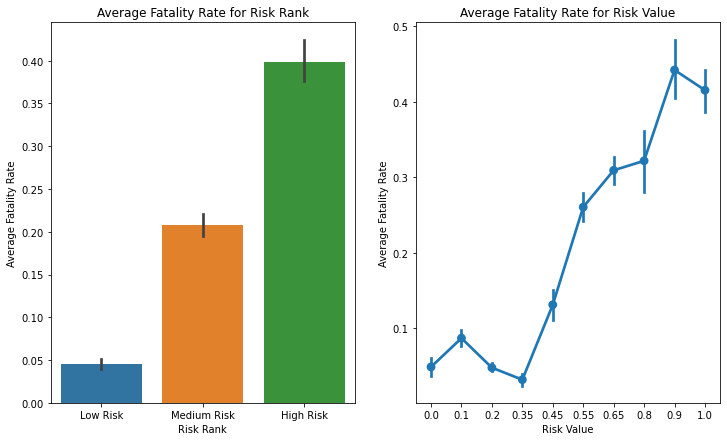

In [48]:
x_vals = list(filtered_mm_with_risk['Risk Value'].unique())

# Look at the relationship between risk index and average fatality rate
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1,2, figsize = (12,7))

sns.barplot(x='Risk Rank' , y='Average Fatality Rate', data = filtered_mm_with_risk, 
            ax = ax[0]).set(title='Average Fatality Rate for Risk Rank')

sns.pointplot(x= 'Risk Value', y='Average Fatality Rate', data = filtered_mm_with_risk, 
             ax = ax[1]).set(title='Average Fatality Rate for Risk Value')
ax[1].set_xticklabels(sorted([round(elem, 2) for elem in x_vals]))

# ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].set_xlim(auto=True)
ax[1].set_ylim(auto=True)

#plt.savefig("avg_fatality_for_risk.png")

The Uninjured Rate is strongly correlated to the Risk Index.

[Text(0, 0, '0.0'),
 Text(1, 0, '0.1'),
 Text(2, 0, '0.2'),
 Text(3, 0, '0.35'),
 Text(4, 0, '0.45'),
 Text(5, 0, '0.55'),
 Text(6, 0, '0.65'),
 Text(7, 0, '0.8'),
 Text(8, 0, '0.9'),
 Text(9, 0, '1.0')]

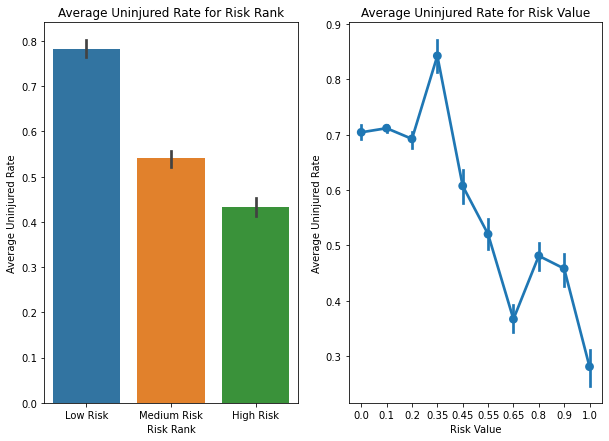

In [49]:
fig, ax = plt.subplots(1,2, figsize = (10,7))

sns.barplot(x='Risk Rank' , y='Average Uninjured Rate', data = filtered_mm_with_risk, 
            ax = ax[0]).set(title='Average Uninjured Rate for Risk Rank')

sns.pointplot(x= 'Risk Value', y='Average Uninjured Rate', data = filtered_mm_with_risk, 
             ax = ax[1]).set(title='Average Uninjured Rate for Risk Value')

ax[1].set_xticklabels(sorted([round(elem, 2) for elem in x_vals]))

#plt.savefig("avg_uninjured_for_risk.png")

Weather Conditions do not have a strong affect on the performance of Low Risk aircrafts, unlike the Medium and High Risk aircrafts.

[Text(0.5, 1.0, 'Average Fatality Rate of Make-Model Risk Rank')]

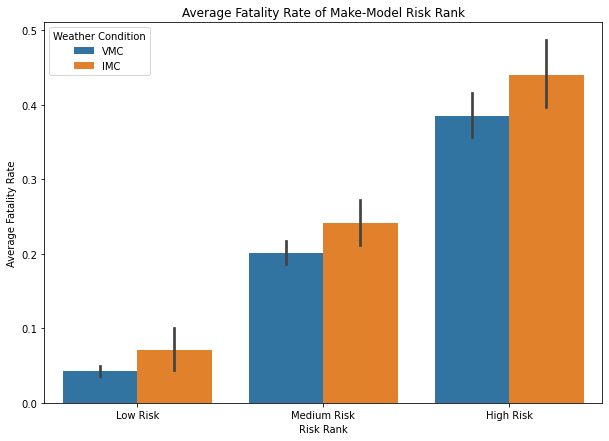

In [50]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Risk Rank' , y='Average Fatality Rate', data = filtered_mm_with_risk, hue= 'Weather Condition').set(title='Average Fatality Rate of Make-Model Risk Rank')

#plt.savefig("avg_fatality_risk_make_model.png")

[Text(0.5, 1.0, 'Risk Value By Manufacturer')]

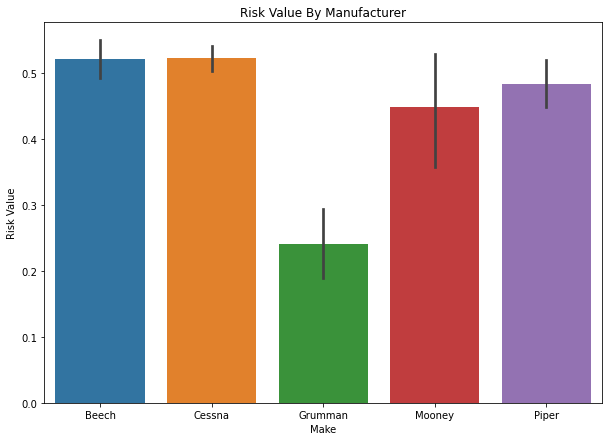

In [51]:
filtered_mm_with_risk['Average Risk Value Per Make'] = filtered_mm_with_risk['Risk Value']
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Make' , y='Risk Value', data = filtered_mm_with_risk).set(title='Risk Value By Manufacturer')
#plt.savefig('risk_fatality_by_make.png')

[Text(0.5, 1.0, 'Average Fatality Rate of Engine Types')]

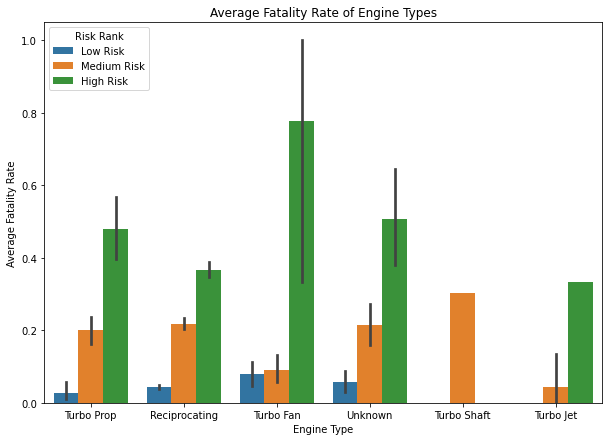

In [52]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Engine Type', y='Average Fatality Rate', data = filtered_mm_with_risk, hue= 'Risk Rank').set(title='Average Fatality Rate of Engine Types')
#plt.savefig('risk_fatality_by_engine.png')

## Results Amongst Low Risk Aircrafts

Create a dataframe with only aircrafts ranked as 'Low Risk'.

In [62]:
low_risk_df = filtered_mm_with_risk[filtered_mm_with_risk['Risk Rank'] == 'Low Risk']

Of the low risk aircrafts, Mooney has the lowest, with all 5 aircrafts having a 0 risk value score. Piper comes second.

[Text(0.5, 1.0, 'Risk Value By Manufacturer')]

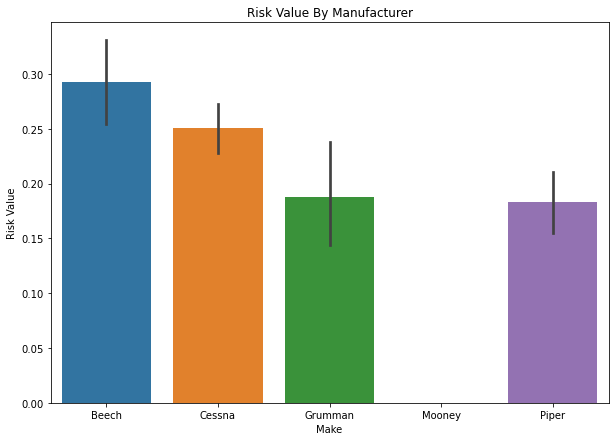

In [56]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(x='Make', y='Risk Value', data = low_risk_df).set(title = 'Risk Value By Manufacturer')
#plt.savefig('risk_val_low_risk_mm_engine.png')

In [63]:
low_risk_df[low_risk_df['Make'] == 'Mooney'].value_counts()

Make-Model   Weather Condition  Make    Number Of Engines  Aircraft Damage  Engine Type    Broad Phase Of Flight  Average Uninjured Rate  Average Fatality Rate  Average Fatality Rate w/ Substantial Damage  Average Minor Injury Rate  Average Serious Injury Rate  Risk Index     Risk Rank  Risk Value  Average Risk Value Per Make
Mooney M20F  VMC                Mooney  1.0                Substantial      Reciprocating  Unknown                0.7                     0.2                    0.0                                          0.15                       0.0                          Low Risk, 0.0  Low Risk   0.0         0.0                            1
                                                                                           Takeoff                0.7                     0.2                    0.0                                          0.15                       0.0                          Low Risk, 0.0  Low Risk   0.0         0.0                            1
      

In [70]:
low_risk_df.drop(['index'], axis=1, inplace=True)

In [85]:
low_risk_df[low_risk_df['Make-Model'] == 'Cessna 172A']

,Make-Model,Weather Condition,Make,Number Of Engines,Aircraft Damage,Engine Type,Broad Phase Of Flight,Average Uninjured Rate,Average Fatality Rate,Average Fatality Rate w/ Substantial Damage,Average Minor Injury Rate,Average Serious Injury Rate,Risk Index,Risk Rank,Risk Value,Average Risk Value Per Make
138,Cessna 172A,VMC,Cessna,1.0,Substantial,Reciprocating,Landing,1.0,0.0,0.0,0.0,0.0,"Low Risk, 0.35",Low Risk,0.35,0.35
142,Cessna 172A,VMC,Cessna,1.0,Substantial,Reciprocating,Takeoff,1.0,0.0,0.0,0.0,0.0,"Low Risk, 0.35",Low Risk,0.35,0.35


In [72]:
df_heatmap = low_risk_df.pivot_table(index='Engine Type', 
                                     columns='Make-Model', 
                                     values='Risk Value', 
                                     aggfunc='mean')  

This heatmap shows us clearly that the green sections correspond with the lowest risk aircraft make-models. We will make our recommendations from these selections. 

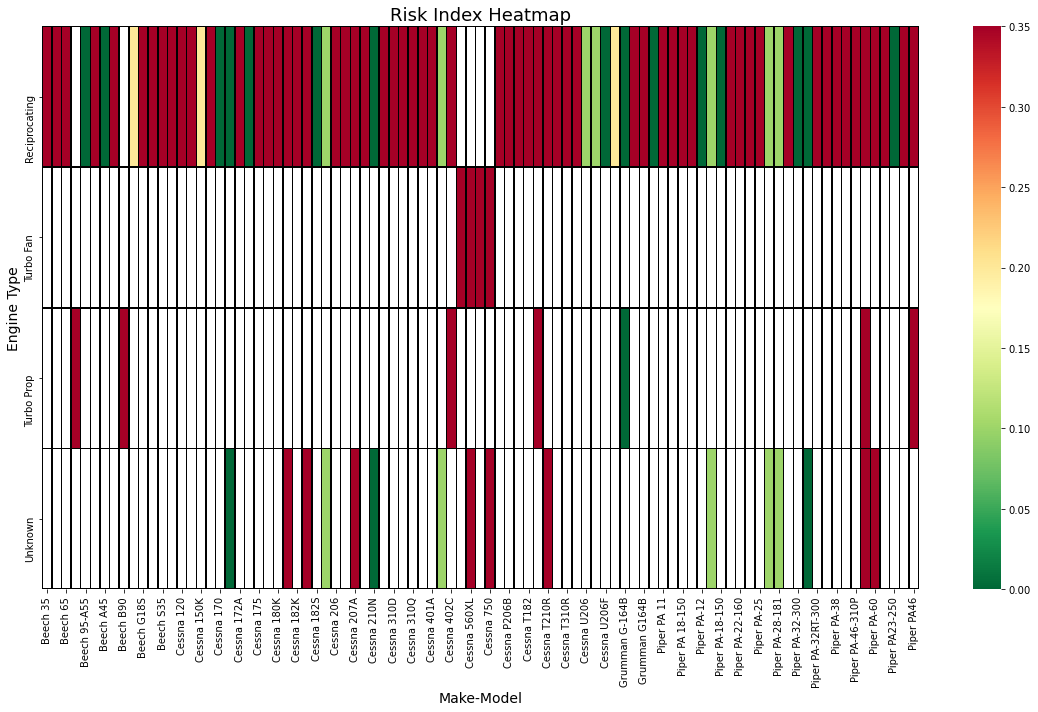

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_heatmap, cmap="RdYlGn_r", annot=False, linewidths=.5,linecolor='black', fmt=".2f")

plt.title("Risk Index Heatmap", fontsize=18)
plt.xlabel("Make-Model", fontsize=14)
plt.ylabel("Engine Type", fontsize=14)

plt.tight_layout()
plt.show()
plt.savefig('low_risk_heat_map.png')


# Top Recommendations for Corporate Travel:

After filtering out manufacturer models that are no longer in production, not being sold in the market, or are unsuitable for our purposes, these are our top recommendations:
- **Piper PA-32-300**
- **Cessna 402C**
- **Cessna 182**



-------------------------------------------------------------------------------------------------------------------




No Longer Manufactured Models OR Not in the Market :
- Cessna 170
- Cessna 170A
- Mooney M20F
- Beech 95-A55
- Beech 45
- Cessna 175
- Piper PA23-250
- Cessna 172RG 



Unsuitable:
- Piper PA-18-150
- Piper PA-18   
- Piper PA-25-235
- Cessna U206F
- Cessna U206E
- Cessna U206
- Grumman G-164B
- Beech A45
- Piper PA-28-181  
- Piper PA-12
